In [159]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import ttest_ind

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [49]:
add_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/additive_test/british/train_cohort_pred.csv", dtype={"sample_names": str, "bmi": float, "bmi_pred": float})
combo_info_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/british/train_cohort.csv")

In [50]:
def get_exp_obs(samples, add_df):
    add_df = add_df.loc[add_df.sample_names.isin(samples)]
    return pd.Series({"bmi_pred": add_df.bmi_pred.mean(), "bmi": add_df.bmi.mean()})


combo_add_info = combo_info_df.combo_samples.str.split("|").apply(get_exp_obs, args=(add_df, ))

In [51]:
combo_info_df = pd.concat((combo_info_df, combo_add_info), axis=1)

/tmp/ipykernel_14534/853751207.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/tmp/ipykernel_14534/853751207.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


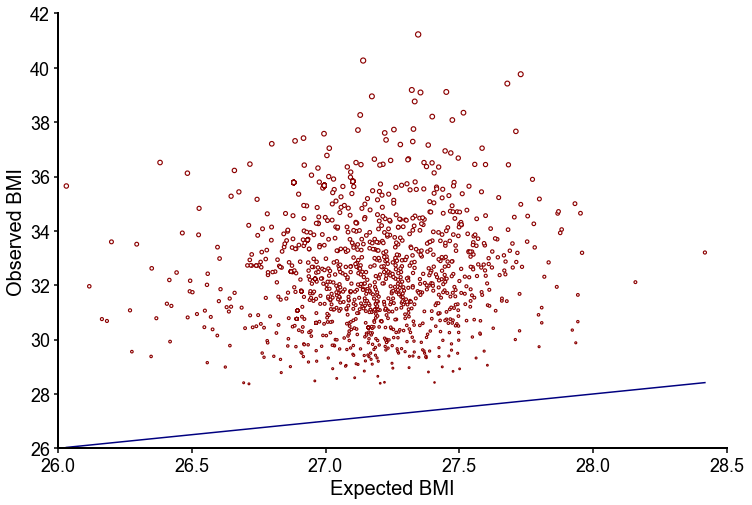

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

plot_df = combo_info_df

plot_df["sizes"] = (plot_df.bmi - plot_df.bmi_pred).abs()

sns_ax = sns.lineplot(data=plot_df, x="bmi_pred", y="bmi_pred", color="navy", ax=ax)


sns_ax2 = sns.scatterplot(data=plot_df, x="bmi_pred", y="bmi", color="white", ax=ax, s=(plot_df.sizes)*2, ec="darkred", linewidth=1.15)

ax.set_xlim((26, 28.5))
ax.set_ylim((26, 42))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
ax.set_xlabel("Expected BMI", fontsize=20)
ax.set_ylabel("Observed BMI", fontsize=20)
# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);



In [162]:
ttest_ind(add_df.bmi, add_df.bmi_pred, alternative="greater", equal_var=False)

TtestResult(statistic=78.93202208040587, pvalue=0.0, df=10322.140574743995)

In [53]:
combo_info_df = pd.concat((combo_info_df, combo_info_df.uniq_items.str.split("|", expand=True).rename(columns={0: "Gene1", 1: "Gene2", 2: "Gene3"})), axis=1)

In [54]:
combo_info_df

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
0,Input_DGCR2|Input_ZIC4,1053457|1461949|2092923|2595445|2704990|292241...,23.3844|30.2425|29.883|34.7296|30.5847|30.5414...,-0.8541|-1.61|0.3673|-0.7502|0.7129|0.2501|0.1...,31.239080,-0.187000,26.424366,31.239080,4.814714,Input_DGCR2,Input_ZIC4,None
1,Input_BCHE|Input_CYP1A1,1146809|1161802|1163158|1173801|1252570|127320...,30.8463|33.1277|58.9468|NA|31.718|29.6969|NA|2...,-0.5259|-0.1472|1.3343|NA|0.041|0.6986|NA|0.67...,30.844506,-0.153458,27.311378,30.844508,3.533129,Input_BCHE,Input_CYP1A1,None
2,Input_EHD1|Input_RBM11,1091043|1752338|1784568|3016558|5972853,27.9687|33.3148|33.5249|32.614|31.3259,-2.0383|1.3635|0.5748|0.2045|-0.1822,31.749660,-0.015540,27.582645,31.749660,4.167015,Input_EHD1,Input_RBM11,None
3,Input_PLEKHF1|Input_ZC3HC1,1318994|1529610|1924951|1946100|3399272|354712...,34.2787|26.6127|34.3767|31.5102|34.0791|33.495...,-0.9222|-1.3579|0.847|0.7661|1.1082|1.4699|-1....,31.545673,0.086964,27.053096,31.545673,4.492577,Input_PLEKHF1,Input_ZC3HC1,None
4,Input_ABCA13|Input_DDX60L,1182163|1253768|1355755|1397710|1491563|149782...,22.0626|32.2567|23.4142|26.1228|NA|NA|NA|26.02...,0.1696|0.4431|-0.4947|1.0083|NA|NA|NA|-0.4018|...,29.369196,-0.253836,27.162253,29.369197,2.206944,Input_ABCA13,Input_DDX60L,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1829,Input_CPT1B|Input_DRG1|Input_SFI1,1220595|2797301|3109180|3593971|4158131|432321...,33.9227|37.0634|26.1545|28.0957|29.1036|33.156...,0.5131|0.6176|-0.9988|-0.7839|-2.2651|0.1041|0...,32.250343,-0.361114,27.198811,32.250343,5.051532,Input_CPT1B,Input_DRG1,Input_SFI1
1830,Input_ACAP3|Input_SLC7A8|Input_TAS1R3,1332204|1545778|3196670|4231707|5749390,35.2955|32.8785|37.4052|34.4526|33.4373,-0.1386|0.1332|-0.8578|0.8237|-0.8838,34.693820,-0.184660,27.392846,34.693820,7.300974,Input_ACAP3,Input_SLC7A8,Input_TAS1R3
1831,Input_F5|Input_NBEAL2|Input_SPINK8,1231350|1417274|2029587|2828581|4227055|469104...,NA|NA|NA|44.8514|31.9673|NA|32.6294|31.3889|26...,NA|NA|NA|1.8361|-0.7897|NA|-1.4216|-0.0547|0.1...,32.200229,-0.172057,26.941635,32.200229,5.258593,Input_F5,Input_NBEAL2,Input_SPINK8
1832,Input_GHDC|Input_KRTAP2-3|Input_TTN,1730047|2108672|3401377|4128798|4978416|509962...,32.3753|NA|26.922|28.1147|34.4894|35.7536|36.1...,-1.1456|NA|-1.1108|0.3841|0.289|0.1913|0.5066|...,30.890500,-0.261078,26.718401,30.890494,4.172093,Input_GHDC,Input_KRTAP2-3,Input_TTN


In [59]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head()

In [156]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
403,Input_CYP4X1|Input_MADD,1352636|2136578|2711845|2919717|3057210|3901565,44.4274|NA|32.1417|43.2854|47.3861|38.892,1.5645|NA|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
884,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078|5929744,47.442|35.994|33.9934|44.1023|39.7988|NA,0.7953|0.5075|0.7309|-0.2195|-0.4762|NA,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
492,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
666,Input_AGL|Input_ZNG1A,1150621|1372125|2169005|4128975|4405589|461742...,41.6244|NA|31.5079|29.3724|NA|45.9755|41.5958|...,0.4372|NA|-1.1315|-1.5094|NA|-0.3921|1.4593|NA...,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
707,Input_LRP1B|Input_MYO15A|Input_TENM2,2149743|2227744|2669838|2998529|4057449|417590...,NA|34.5583|34.8437|NA|NA|NA|NA|51.9459|NA|33.6...,NA|-0.3361|1.7781|NA|NA|NA|NA|0.1492|NA|-1.147...,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2
1791,Input_SLTM|Input_UGT2A1|Input_UGT2A2,1423410|1614892|2371234|5263412|5395078|5575157,44.7485|NA|38.1368|32.807|43.8672|37.5371,1.0786|NA|-0.927|-0.8445|0.6968|0.2338,39.419320,0.047540,27.678681,39.419320,11.740639,Input_SLTM,Input_UGT2A1,Input_UGT2A2
517,Input_CDHR5|Input_LGALS3,1067405|1147403|2063573|3573636|3814661,30.4297|49.1908|42.2968|37.5545|35.9852,0.0213|1.547|-0.6463|1.1504|-0.9388,39.091400,0.226720,27.354521,39.091410,11.736889,Input_CDHR5,Input_LGALS3,None
595,Input_FAM83H|Input_PCDHGA3,1962497|2460496|3644815|3670411|5682786,48.4246|43.8883|40.7407|30.8129|31.6866,0.0106|-1.0231|-1.7079|-0.8444|1.0591,39.110620,-0.501140,27.450827,39.110620,11.659793,Input_FAM83H,Input_PCDHGA3,None
644,Input_COL23A1|Input_SPSB4,1086939|1384098|1408257|1452956|4914345|550853...,45.6209|38.7966|34.9907|44.7059|58.3423|23.951...,2.5981|1.084|1.2164|-0.5|1.5772|-1.1333|-1.2541,38.761071,0.512614,27.332878,38.761079,11.428200,Input_COL23A1,Input_SPSB4,None
1149,Input_ABCA7|Input_LRP5|Input_TSC2,1155754|1370315|2343456|3537203|4181518|5320712,34.2129|35.8849|40.1953|37.461|43.5599|NA,-0.7608|1.2583|-0.5694|-0.1048|1.625|NA,38.262800,0.289660,27.129444,38.262800,11.133356,Input_ABCA7,Input_LRP5,Input_TSC2


In [61]:
all_genes = "|".join(combo_info_df.uniq_items).split("|")

In [154]:
gene_count_dict = Counter(all_genes)

In [64]:
gene_count_dict = Counter(all_genes)

In [131]:
topn = 15

In [132]:
def find_best_factor_for_heatmap(num):
    factors = []
    for i in range(1, int(num**0.5)+1):
        if num%i==0:
            possible_factors = tuple(sorted([i, num//i]))
            if possible_factors[1]/possible_factors[0]<5:
                factors.append(possible_factors)
    return sorted(factors, key=lambda x: abs(2-(x[1]/x[0])))[0]


In [133]:
values_in_arr = topn**2

In [134]:
heatmap_layout = find_best_factor_for_heatmap(values_in_arr)

In [135]:
heatmap_layout

(9, 25)

In [136]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head(topn)

In [138]:
gene_count_dict = Counter("|".join(combo_info_df_mini.uniq_items).split("|"))

In [146]:
xset = set()
yset = set()
zset = set()


myarr = np.zeros(heatmap_layout)
sorted_genes = [g[0] for g in gene_count_dict.most_common()]

for df_values in combo_info_df_mini.itertuples():
    genes = df_values.uniq_items.split("|")
    print(genes)
    break

['Input_CYP4X1', 'Input_MADD']


In [155]:
gene_count_dict["Input_MADD"]

1

[('Input_CYP4X1', 1),
 ('Input_MADD', 1),
 ('Input_CAPN3', 1),
 ('Input_COL5A1', 1),
 ('Input_NAV2', 1),
 ('Input_DHX40', 1),
 ('Input_KIF13A', 1),
 ('Input_AGL', 1),
 ('Input_ZNG1A', 1),
 ('Input_LRP1B', 1),
 ('Input_MYO15A', 1),
 ('Input_TENM2', 1),
 ('Input_SLTM', 1),
 ('Input_UGT2A1', 1),
 ('Input_UGT2A2', 1),
 ('Input_CDHR5', 1),
 ('Input_LGALS3', 1),
 ('Input_FAM83H', 1),
 ('Input_PCDHGA3', 1),
 ('Input_COL23A1', 1),
 ('Input_SPSB4', 1),
 ('Input_ABCA7', 1),
 ('Input_LRP5', 1),
 ('Input_TSC2', 1),
 ('Input_MTFR2', 1),
 ('Input_UBR2', 1),
 ('Input_KLC1', 1),
 ('Input_PRSS53', 1),
 ('Input_AFM', 1),
 ('Input_SHPRH', 1),
 ('Input_DNAH5', 1),
 ('Input_KRT5', 1),
 ('Input_TTN', 1),
 ('Input_CYP1A1', 1),
 ('Input_EP400', 1),
 ('Input_RYR3', 1)]

In [77]:
myarr

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [70]:
sorted(gene_count_dict.values())[::-1]

[230,
 230,
 95,
 66,
 65,
 65,
 65,
 65,
 65,
 65,
 64,
 64,
 60,
 58,
 58,
 49,
 48,
 48,
 48,
 45,
 45,
 45,
 44,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 40,
 38,
 38,
 38,
 37,
 36,
 36,
 36,
 36,
 32,
 29,
 24,
 23,
 20,
 17,
 16,
 15,
 14,
 14,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [60]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
403,Input_CYP4X1|Input_MADD,1352636|2136578|2711845|2919717|3057210|3901565,44.4274|NA|32.1417|43.2854|47.3861|38.892,1.5645|NA|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
884,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078|5929744,47.442|35.994|33.9934|44.1023|39.7988|NA,0.7953|0.5075|0.7309|-0.2195|-0.4762|NA,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
492,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
666,Input_AGL|Input_ZNG1A,1150621|1372125|2169005|4128975|4405589|461742...,41.6244|NA|31.5079|29.3724|NA|45.9755|41.5958|...,0.4372|NA|-1.1315|-1.5094|NA|-0.3921|1.4593|NA...,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
707,Input_LRP1B|Input_MYO15A|Input_TENM2,2149743|2227744|2669838|2998529|4057449|417590...,NA|34.5583|34.8437|NA|NA|NA|NA|51.9459|NA|33.6...,NA|-0.3361|1.7781|NA|NA|NA|NA|0.1492|NA|-1.147...,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2


In [56]:
combo_info_df.sort_values("sizes", ascending=False)

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
403,Input_CYP4X1|Input_MADD,1352636|2136578|2711845|2919717|3057210|3901565,44.4274|NA|32.1417|43.2854|47.3861|38.892,1.5645|NA|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
884,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078|5929744,47.442|35.994|33.9934|44.1023|39.7988|NA,0.7953|0.5075|0.7309|-0.2195|-0.4762|NA,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
492,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
666,Input_AGL|Input_ZNG1A,1150621|1372125|2169005|4128975|4405589|461742...,41.6244|NA|31.5079|29.3724|NA|45.9755|41.5958|...,0.4372|NA|-1.1315|-1.5094|NA|-0.3921|1.4593|NA...,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
707,Input_LRP1B|Input_MYO15A|Input_TENM2,2149743|2227744|2669838|2998529|4057449|417590...,NA|34.5583|34.8437|NA|NA|NA|NA|51.9459|NA|33.6...,NA|-0.3361|1.7781|NA|NA|NA|NA|0.1492|NA|-1.147...,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Input_CACNA1B|Input_RFT1,1604124|1610655|1953609|1975516|2012972|222366...,34.0935|26.7378|25.4937|31.8047|34.0234|29.179...,-0.5564|-0.6436|-0.1983|-1.0605|-0.4577|0.3571...,28.923059,-0.280505,27.500621,28.923053,1.422432,Input_CACNA1B,Input_RFT1,None
195,Input_MCAT|Input_SACS,1007953|1129594|1146388|1197329|1235509|142226...,30.6831|20.5019|25.8761|24.2468|27.8074|26.272...,0.1617|-1.6637|-0.6005|-0.9807|0.2294|1.5856|N...,28.831590,-0.282598,27.476036,28.831589,1.355553,Input_MCAT,Input_SACS,None
552,Input_ANO2|Input_CD9,1028069|1051676|1496170|1520504|1580809|162670...,26.5916|23.4755|32.7278|23.767|33.114|33.1111|...,-1.6513|-1.2004|1.2882|-0.6366|-0.3166|0.4135|...,28.429382,-0.773436,27.219990,28.429373,1.209382,Input_ANO2,Input_CD9,None
135,Input_MYL3|Input_SCAP,1304984|1729183|1761514|1765426|1855728|235638...,NA|24.0278|31.9922|28.3563|22.0767|27.2498|30....,NA|-1.1979|-0.6409|-0.8045|-2.7023|-0.3588|-1....,28.392381,-0.812843,27.204165,28.392385,1.188219,Input_MYL3,Input_SCAP,None
